In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
clusters <- read.table(
    "../../Abed-SI-Mapping/metadata_skin_samples_reformatted.csv", 
    row.names=1,
    header=TRUE, 
    sep=","
)
head(clusters)

,predicted.ID
,<int>
SPIRT5Pre-Skin336_AAACCTGCAAAGAATC-1,1
SPIRT5Pre-Skin336_AAACCTGCAAAGCGGT-1,4
SPIRT5Pre-Skin336_AAACCTGCACATAACC-1,1
SPIRT5Pre-Skin336_AAACCTGCATACTCTT-1,1
SPIRT5Pre-Skin336_AAACCTGGTAAGAGGA-1,1
SPIRT5Pre-Skin336_AAACCTGGTACAGTGG-1,5


In [96]:
print.cluster.overlap <- function(seurat.fn, label, clusters, cluster.id, min.cells = 1) {
    load(seurat.fn)
    seurat <- AddMetaData(object = seurat, metadata=clusters)
    
    print(DimPlot(seurat) + 
          labs(title=paste(label, "on all Harmony dimensions")))

    pbmc <- factor(c("Skin","PBMC")[1 + as.integer(grepl(x=h.df$orig.ident, pattern="PBMC"))])
    h.df <- data.frame(Source=pbmc, h)
    ttests <- lapply(1:20, function(i) {
        t.test(as.formula(paste("harmony_", i, " ~ Source", sep="")), data=h.df)
    })
    p.values <- sapply(ttests, "[[", "p.value")
    plot(p.values)
    harmony.dims <- which(p.values > median(p.values))
    seurat <- RunUMAP(seurat, dims = harmony.dims)
    print(DimPlot(seurat, cells.highlight = rownames(filter(clusters, predicted.ID == 2))) + 
          labs(title=paste(label, "on most platform-neutral dimensions")))
    print(DimPlot(seurat) + 
          labs(title=paste(label, "on most platform-neutral dimensions")))
    
    seurat <- seurat |> FindNeighbors(dims = harmony.dims, reduction="harmony") |> FindClusters(resolution = 0.5)
    print(table(seurat@meta.data$predicted.ID, seurat@meta.data$seurat_clusters))
    print(table(seurat@meta.data$seurat_clusters, seurat@meta.data$orig.ident))
    overlapping_clusters <- names(which(table(seurat@meta.data$predicted.ID, seurat@meta.data$seurat_clusters)["2",] >= min.cells))
    print(table(seurat@meta.data$seurat_clusters, seurat@meta.data$orig.ident)[overlapping_clusters, ])    
    seurat
}

17:09:08 UMAP embedding parameters a = 0.9922 b = 1.112

17:09:08 Read 7987 rows and found 10 numeric columns

17:09:08 Using Annoy for neighbor search, n_neighbors = 30

17:09:08 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:09:09 Writing NN index file to temp file /tmp/RtmpEMHu7g/file3911381a7cd

17:09:09 Searching Annoy index using 1 thread, search_k = 3000

17:09:12 Annoy recall = 100%

17:09:12 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

17:09:12 Initializing from normalized Laplacian + noise (using RSpectra)

17:09:12 Commencing optimization for 500 epochs, with 324678 positive edges

17:09:21 Optimization finished



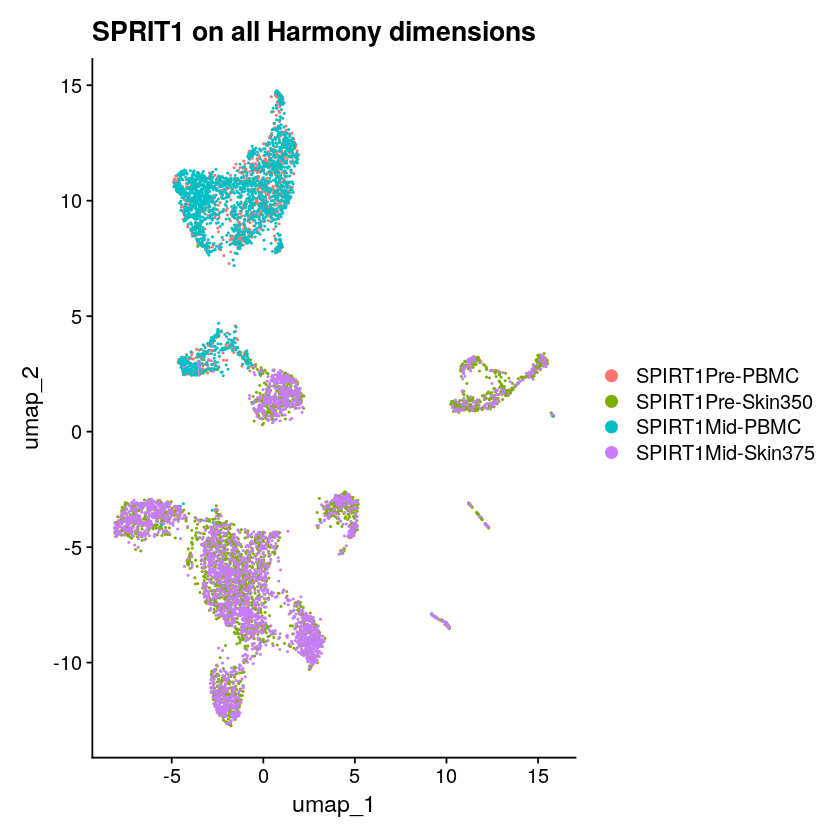

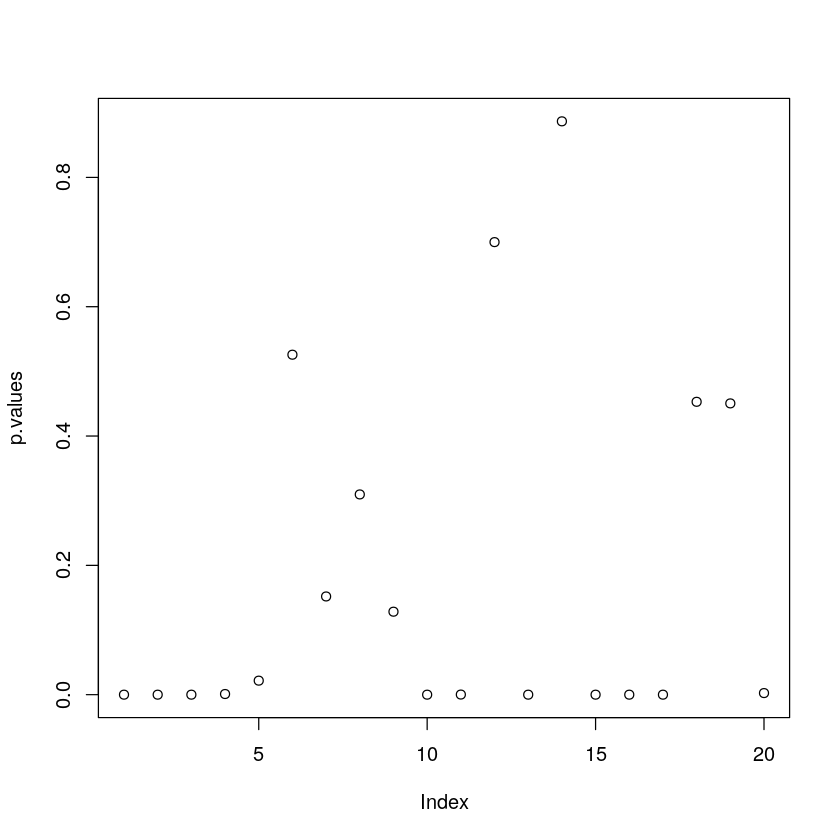

Computing nearest neighbor graph

Computing SNN



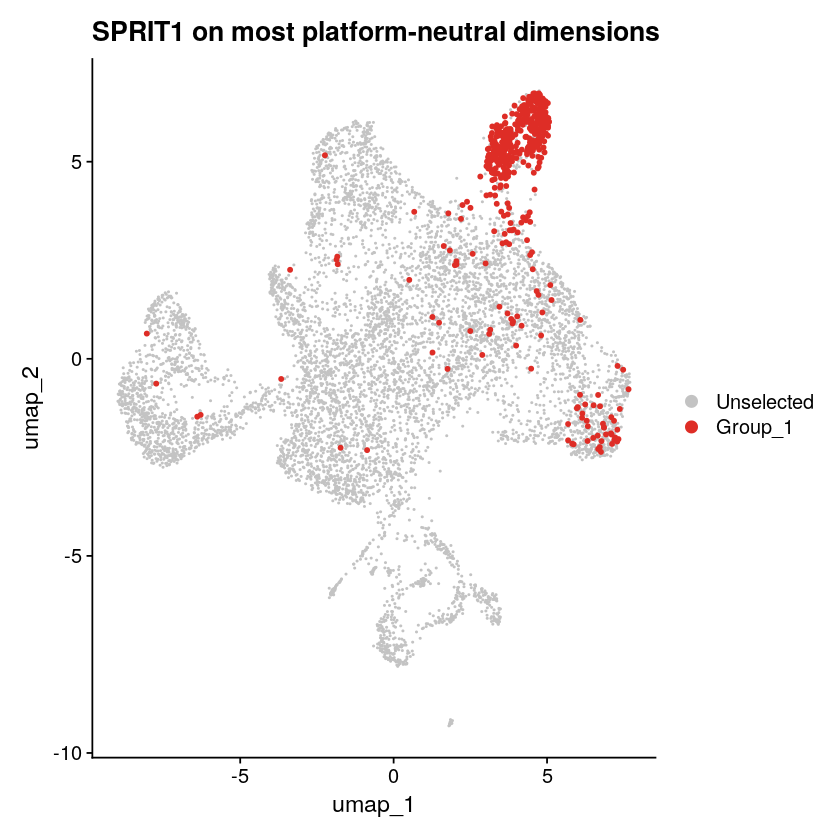

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7987
Number of edges: 262297

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8770
Number of communities: 14
Elapsed time: 0 seconds
    
       0   1   2   3   4   5   6   7   8   9  10  11  12  13
  1  583 117  14  37   9  46  60   1   0   0   5   0   1   0
  2    5  36  10   0   1  23  37 367   1   0   0   0   0   0
  3    3   5   0 562   0   5   0   1   0   0   0   0   0   1
  4  284 208   4  16   9  87  93   1   1   0   1   0   4   0
  5   79  10   9   2 423  11  74   0   0   0   1   0   0   0
  6   18   8  11   0   4   4  56   0  21   0   0   0   0   0
  7  187  59   3   8  11   7  27   2   0   0  20   0   0   0
  8    5   0   0   1   2   0   6   0   0   0   6   0   0   0
  9   29  40   9   0   2   3  39   0 118   0   2   0   0   1
  10   3   0  10   0   1   0   0   0 157   0   0   0   2   0
  11   0   0   0   2   1  19   0   1   0   0   0   0   0   0
  14  10   4   0 

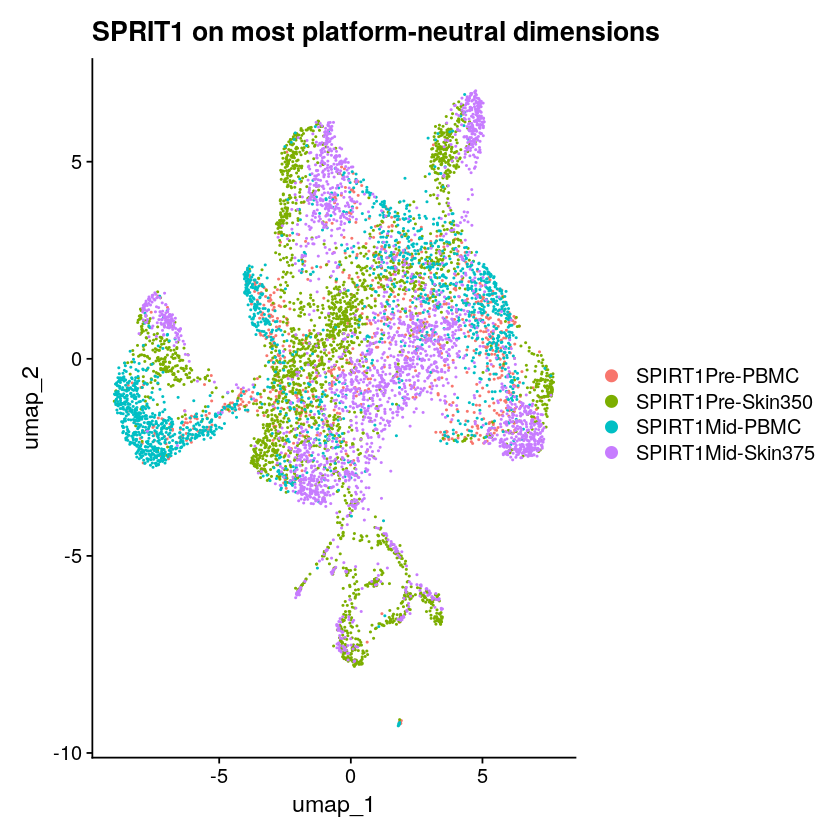

In [97]:
s <- print.cluster.overlap("outs-harmonize1/SPIRT1.RData", "SPRIT1", clusters, "2")

In [103]:
?RunUMAP

RunUMAP {Seurat},R Documentation
object,An object
...,Arguments passed to other methods and UMAP
reduction.key,"dimensional reduction key, specifies the string before the number for the dimension names. UMAP by default"
assay,"Assay to pull data for when using features, or assay used to construct Graph if running UMAP on a Graph"
reduction.model,DimReduc object that contains the umap model
return.model,whether UMAP will return the uwot model
umap.method,UMAP implementation to run. Can be uwot:Runs umap via the uwot R package uwot-learn:Runs umap via the uwot R package and return the learned umap model umap-learn:Run the Seurat wrapper of the python umap-learn package
n.neighbors,This determines the number of neighboring points used in local approximations of manifold structure. Larger values will result in more global structure being preserved at the loss of detailed local structure. In general this parameter should often be in the range 5 to 50.
n.components,The dimension of the space to embed into.
metric,"metric: This determines the choice of metric used to measure distance in the input space. A wide variety of metrics are already coded, and a user defined function can be passed as long as it has been JITd by numba."


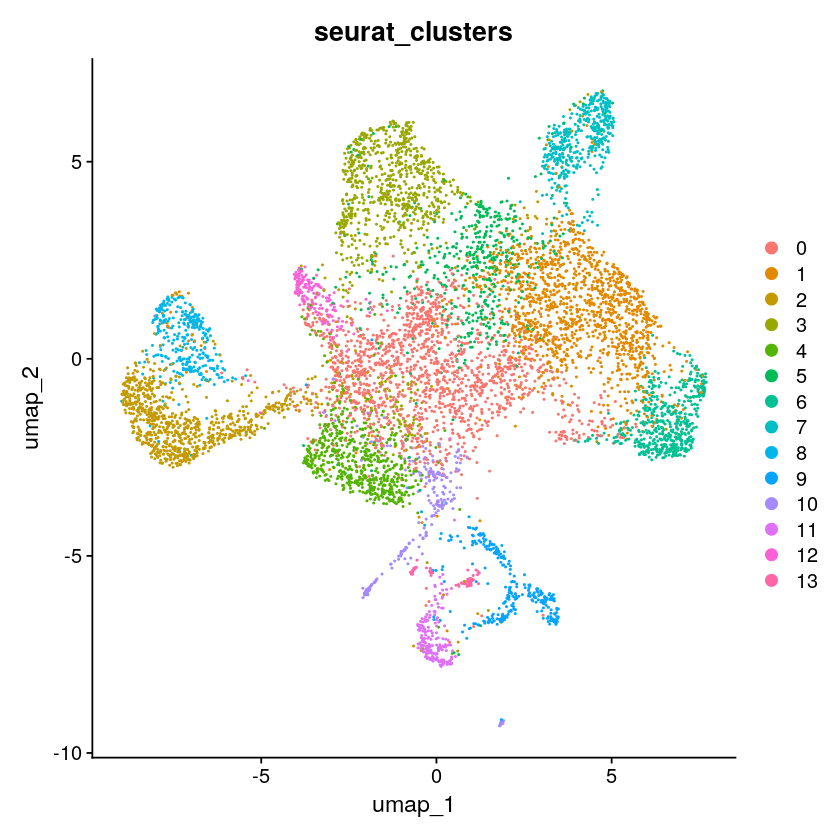

In [101]:
DimPlot(s, group.by="seurat_clusters")

In [100]:
head(s@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,predicted.ID,RNA_snn_res.0.5,seurat_clusters
,<chr>,<dbl>,<int>,<dbl>,<int>,<fct>,<fct>
SPIRT1Pre-PBMC_AAACAAGCATTGAAGTACTTTAGG-1,SPIRT1Pre-PBMC,2402,1589,2.373022,NA,2,2
SPIRT1Pre-PBMC_AAACGTTCACATACCTACTTTAGG-1,SPIRT1Pre-PBMC,3942,2290,1.547438,NA,1,1
SPIRT1Pre-PBMC_AAACTGTCACATAGTGACTTTAGG-1,SPIRT1Pre-PBMC,3687,2126,2.685110,NA,1,1
SPIRT1Pre-PBMC_AAACTGTCACGCCACTACTTTAGG-1,SPIRT1Pre-PBMC,1114,777,4.398564,NA,4,4
SPIRT1Pre-PBMC_AAAGCGAAGCAGCCAAACTTTAGG-1,SPIRT1Pre-PBMC,3694,2131,1.976178,NA,5,5
SPIRT1Pre-PBMC_AAAGCGAAGCTCATTGACTTTAGG-1,SPIRT1Pre-PBMC,3048,1992,2.723097,NA,2,2


In [102]:
slotNames(s@reductions$harmony)

[1] "cell.embeddings"            "feature.loadings"          
[3] "feature.loadings.projected" "assay.used"                
[5] "global"                     "stdev"                     
[7] "jackstraw"                  "misc"                      
[9] "key"

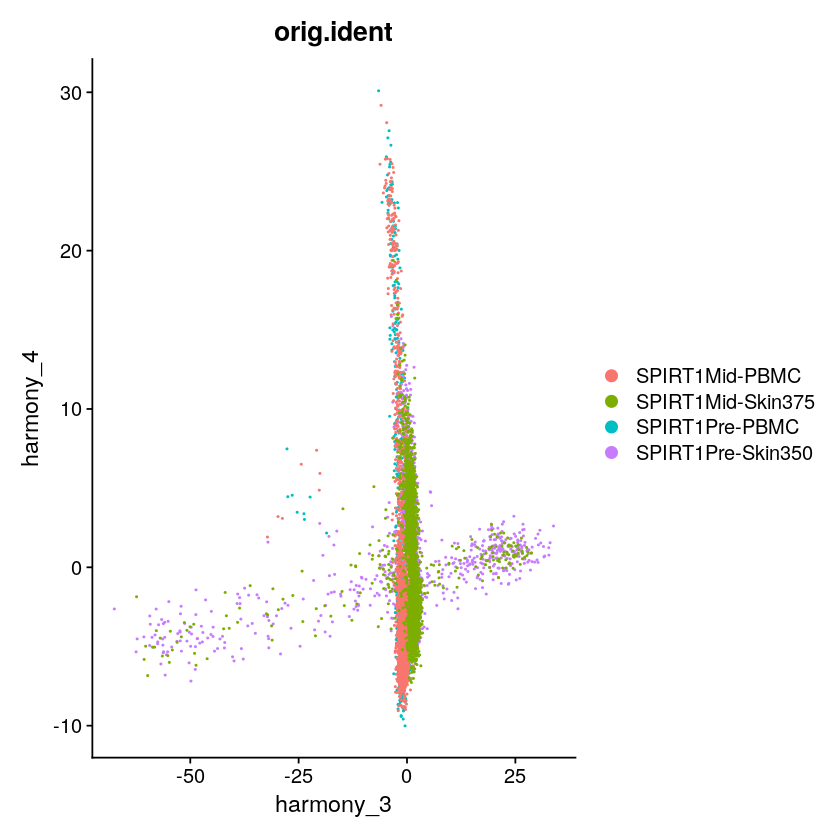

In [15]:
DimPlot(
    s, reduction="harmony", 
    group.by="orig.ident", 
    dims=3:4
)

In [46]:
pbmc <- factor(c("Skin","PBMC")[1 + as.integer(grepl(x=h.df$orig.ident, pattern="PBMC"))])
head(pbmc)
h.df <- data.frame(s@meta.data, Source=pbmc, h)
head(h.df)

[1] PBMC PBMC PBMC PBMC PBMC PBMC
Levels: PBMC Skin

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,predicted.ID,RNA_snn_res.0.5,seurat_clusters,Source,harmony_1,harmony_2,⋯,harmony_11,harmony_12,harmony_13,harmony_14,harmony_15,harmony_16,harmony_17,harmony_18,harmony_19,harmony_20
,<chr>,<dbl>,<int>,<dbl>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SPIRT1Pre-PBMC_AAACAAGCATTGAAGTACTTTAGG-1,SPIRT1Pre-PBMC,2402,1589,2.373022,NA,2,2,PBMC,-6.884011,10.426582,⋯,-0.7322677,1.650428585,0.5153715,-2.2674606,1.985897,-0.3273288,1.24337298,3.0483269,-0.02693151,-0.7029039
SPIRT1Pre-PBMC_AAACGTTCACATACCTACTTTAGG-1,SPIRT1Pre-PBMC,3942,2290,1.547438,NA,1,1,PBMC,-7.234851,13.567089,⋯,-1.1718824,-0.690394420,-0.2189963,0.5593882,1.442058,1.9785572,-1.32425573,-0.8009371,-3.84093008,-2.5259638
SPIRT1Pre-PBMC_AAACTGTCACATAGTGACTTTAGG-1,SPIRT1Pre-PBMC,3687,2126,2.685110,NA,1,1,PBMC,-6.466147,9.535505,⋯,0.2973619,-0.385326149,-0.3420025,3.1085220,-2.081836,0.9295507,-0.06050048,-1.9657004,-0.41241020,-0.8323776
SPIRT1Pre-PBMC_AAACTGTCACGCCACTACTTTAGG-1,SPIRT1Pre-PBMC,1114,777,4.398564,NA,1,1,PBMC,-5.179471,4.009647,⋯,4.6385374,0.529430018,-1.1455935,-3.0916351,-3.791023,1.7545251,4.54522815,-5.5026506,0.01914102,1.7515696
SPIRT1Pre-PBMC_AAAGCGAAGCAGCCAAACTTTAGG-1,SPIRT1Pre-PBMC,3694,2131,1.976178,NA,1,1,PBMC,-6.010848,10.900398,⋯,-0.4484228,0.039114950,0.7920128,2.0537948,-3.181995,1.9818403,-2.72635792,0.8551943,-1.46560889,-0.1845120
SPIRT1Pre-PBMC_AAAGCGAAGCTCATTGACTTTAGG-1,SPIRT1Pre-PBMC,3048,1992,2.723097,NA,2,2,PBMC,-6.398347,11.467345,⋯,-3.2923884,0.004042522,0.8874569,-1.7639125,5.833128,0.4255932,1.57557725,2.8111280,-0.71324359,-1.7499072


In [50]:
t.test(harmony_1 ~ Source, data=h.df)
t.test(harmony_2 ~ Source, data=h.df)


	Welch Two Sample t-test

data:  harmony_1 by Source
t = -42.901, df = 5773.3, p-value < 2.2e-16
alternative hypothesis: true difference in means between group PBMC and group Skin is not equal to 0
95 percent confidence interval:
 -9.499696 -8.669454
sample estimates:
mean in group PBMC mean in group Skin 
         -6.211636           2.872939 



	Welch Two Sample t-test

data:  harmony_2 by Source
t = 165.47, df = 7025.9, p-value < 2.2e-16
alternative hypothesis: true difference in means between group PBMC and group Skin is not equal to 0
95 percent confidence interval:
 13.84111 14.17300
sample estimates:
mean in group PBMC mean in group Skin 
          9.240137          -4.766920 


In [57]:
h.pbmc.means <- colMeans(h[pbmc == "PBMC", ])
h.notPbmc.means <- colMeans(h[pbmc == "Skin", ])
h.sds <- apply(h, 2, sd)

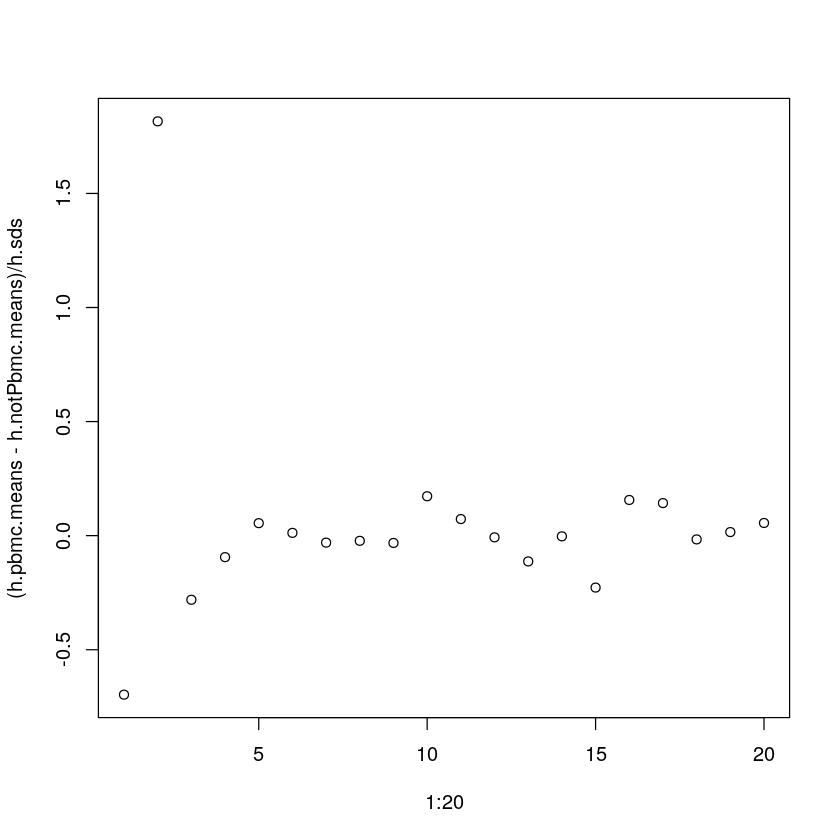

In [61]:
plot(1:20, (h.pbmc.means - h.notPbmc.means) / h.sds)

In [80]:
ttests <- lapply(1:20, function(i) t.test(as.formula(paste("harmony_", i, " ~ Source", sep="")), data=h.df)
)
names(ttests) <- paste("harmony_", 1:20, sep="")

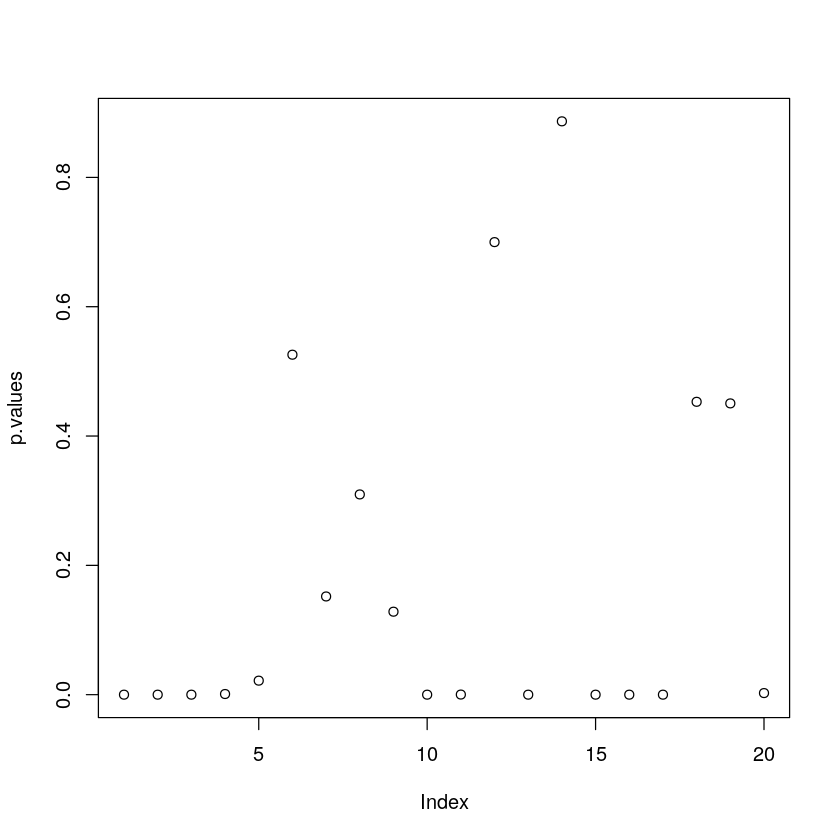

In [82]:
p.values <- sapply(ttests, "[[", "p.value")
plot(p.values)

In [85]:
which(p.values < median(p.values))

harmony_1  harmony_2  harmony_3  harmony_4 harmony_10 harmony_11 harmony_13 
         1          2          3          4         10         11         13 
harmony_15 harmony_16 harmony_17 
        15         16         17